1、准备工作

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram   #绘制聚类图工具
import matplotlib.pyplot as plt
import nbimporter           #jupyter notebook中import“.ipynb”文件的工具
import drawcluster          #自己写的绘图工具包

2、数据预处理

In [3]:
orig_data = pd.read_excel('D:\\Code\\FCM\\data2.xlsx', index_col = 0)  #导入数据表
data = np.array(orig_data)
data_scaled = preprocessing.scale(data)/np.sqrt(data.shape[0]/(data.shape[0]-1))

3、模糊相似矩阵

In [4]:
def smi(x):
    """
    使用相关系数法计算相似矩阵
    """
    n, m = np.shape(x)
    r = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            r[i, j] = (np.sum(np.abs(x[i,:]-np.mean(x[i,:])) * np.abs(x[j,:]-np.mean(x[j,:])))/
                      (np.linalg.norm(np.abs(x[i,:]-np.mean(x[i,:]))) 
                     * np.linalg.norm(np.abs(x[j,:]-np.mean(x[j,:])))))
    return r 

In [5]:
def smi_d(x):
    """
    使用距离法计算相似矩阵
    """
    n, m = np.shape(x)
    r = np.empty((n, n))
    c = 0.3
    for i in range(n):
        for j in range(n):
            #r[i, j] = 1 - c * np.sqrt(np.sum(np.square(x[i, :] - x[j, :])))
            r[i, j] = 1 - c * np.linalg.norm(x[i, :], x[j, :])
    return r

4、模糊等价矩阵

In [6]:
def equ(x,n,m):
    """
    计算模糊等价矩阵
    """
    r = np.empty((n,m))
    for i in range(n):
        for j in range(m):
            r[i,j] = np.max(np.min(np.array([x[i,:],x[:,j].T]),axis = 0))
    if (r == x).all():
        return r
    else:
        return equ(r,n,m)           #注意：此处若直接迭代，调用equ()，返回值只会传到倒数第二层

5、主代码

In [7]:
np.set_printoptions(threshold = np.inf)        #矩阵太大无法显示完全
m_smilar = smi(data_scaled)                    #求模糊相似矩阵
n, m = np.shape(m_smilar)
m_equal = equ(m_smilar,n,m)                    #求模糊等价矩阵
print(m_equal)
#print(m_smilar)

[[ 1.          0.79126999  0.82127288  0.79192508  0.82127288  0.82127288
   0.74380484  0.77569298  0.82127288  0.82127288  0.82127288  0.82127288
   0.82127288  0.82127288  0.82127288  0.79634682  0.82127288  0.7930533
   0.82127288  0.7916288   0.78412926  0.7916288   0.82127288  0.7916288
   0.82127288  0.81162307  0.82127288  0.76759617  0.82127288  0.82127288
   0.78831771  0.82127288  0.82127288  0.82127288  0.82127288  0.82127288
   0.82127288  0.82127288  0.82127288]
 [ 0.79126999  1.          0.79126999  0.79126999  0.79126999  0.79126999
   0.74380484  0.77569298  0.79126999  0.79126999  0.79126999  0.79126999
   0.79126999  0.79126999  0.79126999  0.79126999  0.79126999  0.79126999
   0.79126999  0.79126999  0.78412926  0.79126999  0.79126999  0.79126999
   0.79126999  0.79126999  0.79126999  0.76759617  0.79126999  0.79126999
   0.78831771  0.79126999  0.79126999  0.79126999  0.79126999  0.79126999
   0.79126999  0.79126999  0.79126999]
 [ 0.82127288  0.79126999  1.       

6、截矩阵

In [10]:
k = 0.8                                     #选取截取水平进行模糊聚类
result = np.empty((n, m))
for i in range(n):
    for j in range(m):
        if m_equal[i, j] >= k:
            result[i, j] = 1
        else:
            result[i, j] = 0
print(result)

[[ 1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
   1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
   1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
   1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.
   1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 0.  0.  0.  0.  0. 

7、可视化

Done
Done
Done


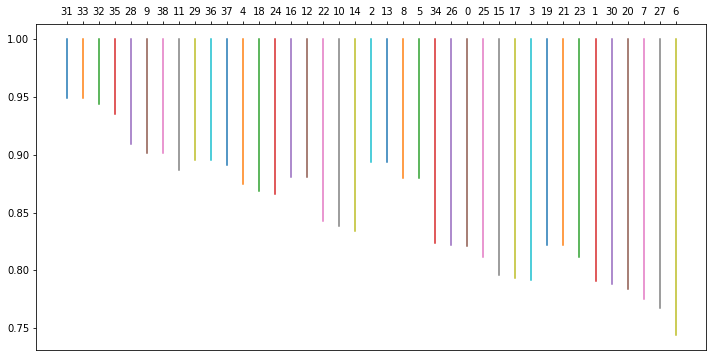

In [8]:
drawcluster.draw(m_equal, n)

[[  3.10000000e+01   3.30000000e+01   7.25648323e-02   2.00000000e+00]
 [  3.20000000e+01   3.90000000e+01   8.01798858e-02   3.00000000e+00]
 [  3.50000000e+01   4.00000000e+01   9.28197923e-02   4.00000000e+00]
 [  2.80000000e+01   4.10000000e+01   1.36319650e-01   5.00000000e+00]
 [  9.00000000e+00   3.80000000e+01   1.38861582e-01   2.00000000e+00]
 [  2.90000000e+01   3.60000000e+01   1.48186039e-01   2.00000000e+00]
 [  2.00000000e+00   1.30000000e+01   1.50407526e-01   2.00000000e+00]
 [  3.70000000e+01   4.40000000e+01   1.54098880e-01   3.00000000e+00]
 [  1.10000000e+01   4.30000000e+01   1.61104938e-01   3.00000000e+00]
 [  4.20000000e+01   4.70000000e+01   1.61153944e-01   8.00000000e+00]
 [  4.60000000e+01   4.80000000e+01   1.64806551e-01   1.10000000e+01]
 [  1.20000000e+01   1.60000000e+01   1.68295801e-01   2.00000000e+00]
 [  5.00000000e+00   8.00000000e+00   1.69821792e-01   2.00000000e+00]
 [  4.00000000e+00   4.90000000e+01   1.81170556e-01   1.20000000e+01]
 [  1.

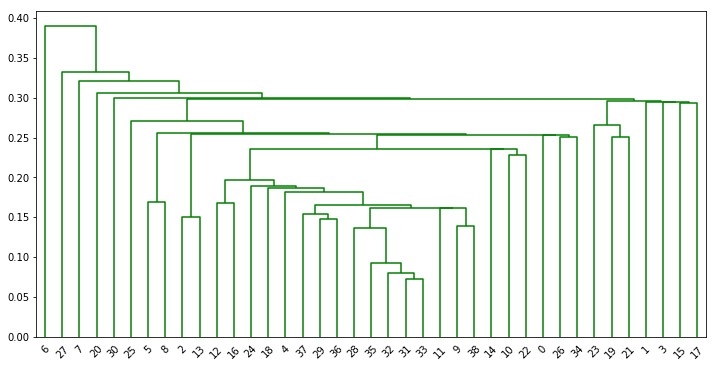

In [9]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
z = linkage(m_equal, "single")         #返回（n-1）*4的矩阵，四列分别表示聚类簇1、2的编号、
print(z)                               #聚类簇1、2的最小间距、每个聚类簇包含的元素个数
dendrogram(z, color_threshold = 2, leaf_font_size = 10)
plt.show()